In [1]:
pip install opencv-python numpy matplotlib


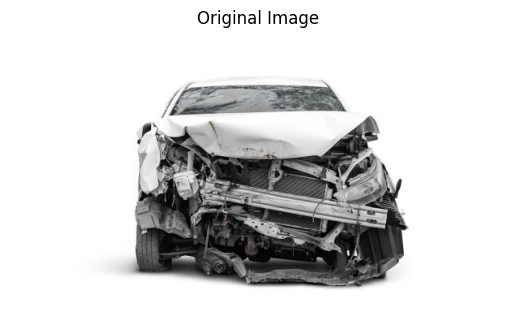

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/damages car.jpg"
image = cv2.imread(image_path)

# Convert BGR to RGB (for correct visualization in Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()


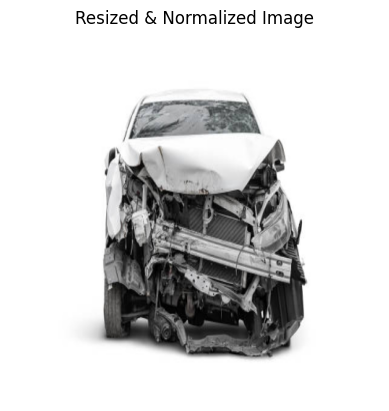

In [4]:
# Resize image to a standard size (e.g., 512x512)
resized = cv2.resize(image, (512, 512))

# Normalize pixel values (scaling between 0-1)
normalized = resized / 255.0

# Display
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Resized & Normalized Image")
plt.show()


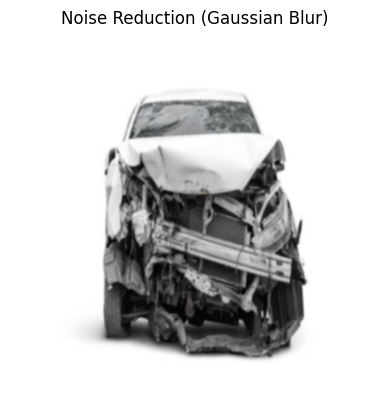

In [5]:
# Use Gaussian Blur to smooth out noise
blurred = cv2.GaussianBlur(resized, (5,5), 0)

plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Noise Reduction (Gaussian Blur)")
plt.show()


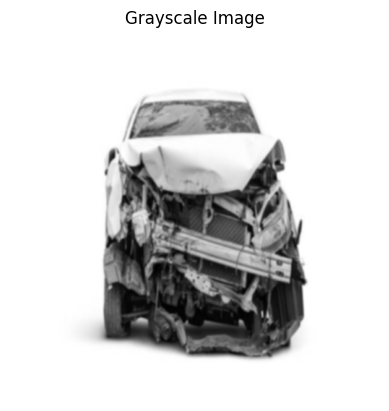

In [6]:
# Convert to grayscale for easier processing
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

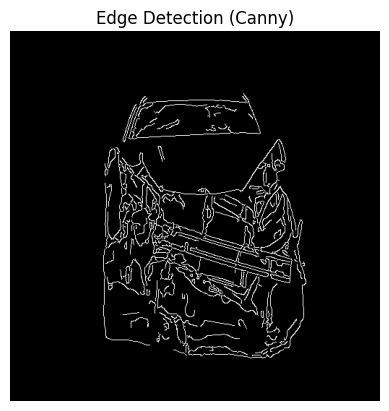

In [7]:
# Detect edges to highlight damaged areas
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.title("Edge Detection (Canny)")
plt.show()


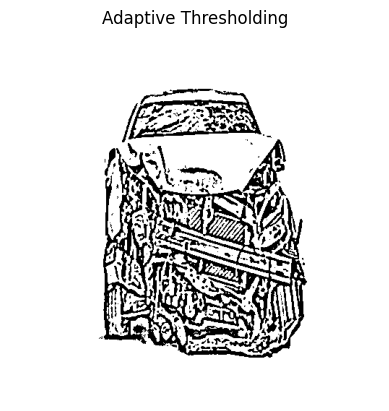

In [8]:
# Improve contrast using Adaptive Thresholding
thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.title("Adaptive Thresholding")
plt.show()


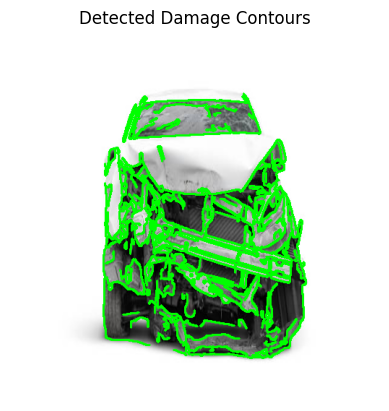

In [9]:
# Find contours to detect damaged areas
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoured_image = resized.copy()
cv2.drawContours(contoured_image, contours, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Damage Contours")
plt.show()


In [10]:
# Save the processed image for further analysis
cv2.imwrite("preprocessed_car_image.jpg", contoured_image)


True

In [11]:
pip install streamlit opencv-python numpy pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [12]:
import streamlit as st
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to preprocess image
def preprocess_image(image):
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return edges

# Streamlit UI
st.title("Damaged Car Image Preprocessing")
uploaded_file = st.file_uploader("Upload a car image", type=["jpg", "png", "jpeg"])

if uploaded_file:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess image
    processed_image = preprocess_image(image)

    # Display processed image
    st.image(processed_image, caption="Processed Image (Edge Detection)", use_column_width=True)


2025-05-10 10:43:53.760 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.850 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-10 10:43:53.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.856 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 10:43:53.857 Thread 'MainThread': mi

In [13]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("huseyinrakun/carscsv")

print("Path to dataset files:", path)


100%|██████████| 10.3k/10.3k [00:00<00:00, 12.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/huseyinrakun/carscsv/versions/1


In [21]:
import pandas as pd
import seaborn as sns
import os

# Update with the correct path from the 'path' variable
dataset_folder = '/root/.cache/kagglehub/datasets/huseyinrakun/carscsv/versions/1'

# Find the CSV file within the folder
for filename in os.listdir(dataset_folder): # Use the correct path
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_folder, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file using the identified file path
df = pd.read_csv(csv_file_path)  # Use csv_file_path instead of dataset_folder
print(df.head())

   age  gender  miles   debt  income  sales
0   28       0     23      0    4099    620
1   26       0     27      0    2677   1792
2   30       1     58  41576    6215  27754
3   26       1     25  43172    7626  28256
4   20       1     17   6979    8071   4438


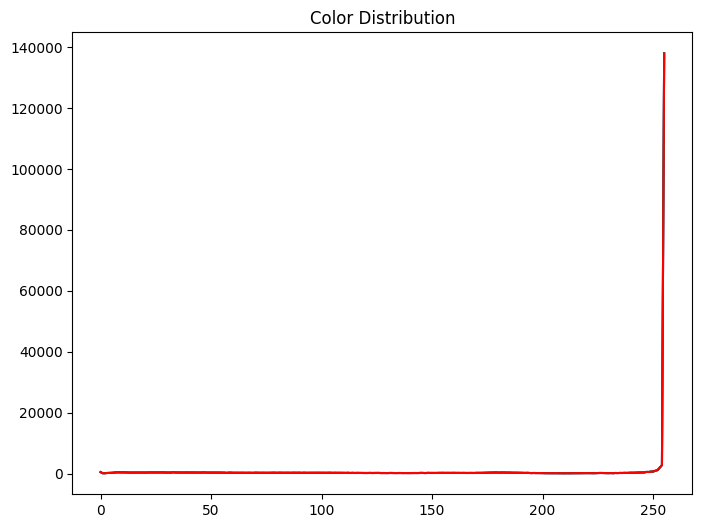

In [22]:
import matplotlib.pyplot as plt
import cv2

# Read and plot color channels
# Directly use the image path with cv2.imread
img = cv2.imread("/content/damages car.jpg")
colors = ('b', 'g', 'r')

plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title("Color Distribution")
plt.show()

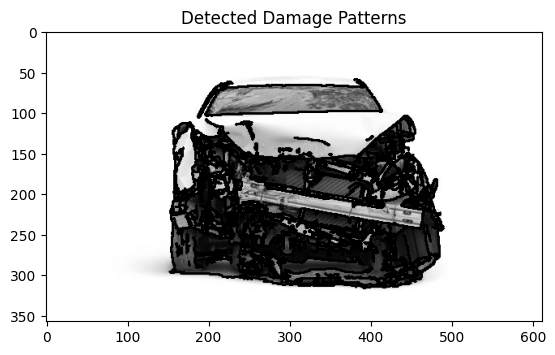

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Example: Detect contours of damaged regions
# Assuming 'image_path_column' is the column containing image paths in your DataFrame
# image_path_column = '/content/damages car.jpg'  # This was the issue - it's the path, not column name
img_path = '/content/damages car.jpg' # Directly using the image path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plt.imshow(img, cmap="gray")
plt.title("Detected Damage Patterns")
plt.show()